# Escriba un codigo para ajustar datos bidimensionales a una parabola usando estadistica Bayesiana y el  algoritmo de Metropolis Hastings.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

<ErrorbarContainer object of 3 artists>

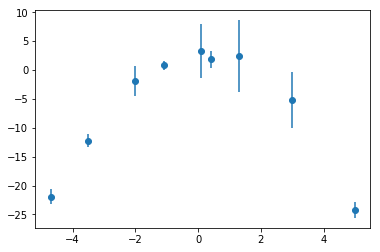

In [4]:
# Datos
x_obs = np.array([-2.0,1.3,0.4,5.0,0.1, -4.7, 3.0, -3.5,-1.1])
y_obs = np.array([ -1.931,   2.38,   1.88,  -24.22,   3.31, -21.9,  -5.18, -12.23,   0.822])
sigma_y_obs = ([ 2.63,  6.23, -1.461, 1.376, -4.72,  1.313, -4.886, -1.091,  0.8054])
plt.errorbar(x_obs, y_obs, yerr=sigma_y_obs, fmt='o')

In [10]:
# Modelo. Es un polinomio de grado n_param
def model(x,param):
    n_param = len(param)
    y = 0
    for i in range(n_param):
        y += param[i] * x**i
    return y 

# Prior. Doy un intervalo grande donde se que van a caer todos los parametros del modelo
def logprior(param):
    p = 0.0
    n_param = len(param)
    for i in range(n_param):
        if param[i] < 20 and param[i]>-20 :
            p += 0.0
        else:
            p += np.inf
    return p

# Likelihood. En realidad es -loglike que es mas conveniente algebraicamente    
def loglikelihood(x_obs, y_obs, sigma_y_obs, param):
    d = y_obs -  model(x_obs, param)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

In [12]:
# Cadena de Markov (Metropolis-Hashtings)
N = 50000
l_param = [np.random.random(3)]
sigma_param = [1.0, 0.5, 0.1]
n_param = len(sigma_param)
for i in range(1,N):
    propuesta  = l_param[i-1] + np.random.normal(size=n_param)*sigma_param
    logposterior_viejo = loglikelihood(x_obs, y_obs, sigma_y_obs, l_param[i-1]) + logprior(l_param[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, sigma_y_obs, propuesta) + logprior(propuesta)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        l_param.append(propuesta)
    else:
        l_param.append(l_param[i-1])

# Matriz 50000x3. Las filas estimaciones de parametros y cada columna es un parametro
l_param = np.array(l_param)
print(np.shape(l_param))

# Promedio todas las estimaciones por columnas para encontrar el promedio de la estimacion de parametros
best = []
for i in range(n_param):
    best.append(np.mean(l_param[:,i]))

print(best)

(50000, 3)
[2.1865185767769297, 0.15418673863701188, -1.0811554614516947]


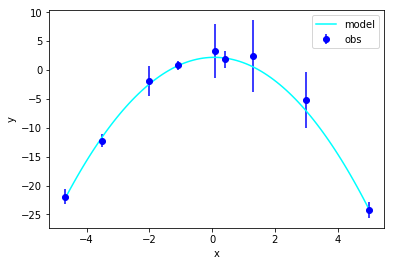

In [14]:
# Plots
x_model = np.linspace(x_obs.min(), x_obs.max(), 100)
y_model = model(x_model, best)

plt.errorbar(x_obs,y_obs, yerr=sigma_y_obs, fmt='o', label='obs', color='blue')
plt.plot(x_model, y_model, label='model', color='cyan')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('best_model.pdf')